In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.io.datasets import CSVReader
from src.config.settings import get_settings

%matplotlib widget

In [2]:
settings = get_settings()

reader = CSVReader()

In [3]:
disguise_results = reader.read(settings.WEIGHTED_PLAY_DISGUISE_RESULTS_FILE)
play_data = reader.read(settings.get_data_file_path(file=settings.PLAYS_FILE))

In [4]:
blitz_results = disguise_results[disguise_results["wasInitialPassRusher"] == 1]

In [5]:
merged_df = pd.merge(blitz_results, play_data[['gameId', 'playId', 'expectedPointsAdded', 'yardsGained', 'unblockedPressure', 'passResult', 'timeToSack']], 
                     on=['gameId', 'playId'], 
                     how='left')

In [6]:
divisions = [0.75, 0.5, 0.25]

top_quarter = merged_df[merged_df.disguise_score >= divisions[0]].sort_values(by="disguise_score", ascending=False)
medium_top = merged_df[(merged_df.disguise_score < divisions[0]) & (merged_df.disguise_score >= divisions[1])].sort_values(by="disguise_score", ascending=False)
medium_bottom = merged_df[(merged_df.disguise_score < divisions[1]) & (merged_df.disguise_score >= divisions[2])].sort_values(by="disguise_score", ascending=False)
bottom_quarter = merged_df[merged_df.disguise_score < divisions[2]].sort_values(by="disguise_score", ascending=False)

print(top_quarter.shape[0], medium_top.shape[0], medium_bottom.shape[0], bottom_quarter.shape[0])

282 71 47 32


In [7]:
percentages = {
    'Top Quarter': {
        'Pressure': top_quarter.causedPressure.sum() / top_quarter.shape[0] * 100,
        'Hit': top_quarter.quarterbackHit.sum() / top_quarter.shape[0] * 100,
        'Unblocked Pressure': top_quarter.unblockedPressure.sum() / top_quarter.shape[0] * 100
    },
    'Medium Top': {
        'Pressure': medium_top.causedPressure.sum() / medium_top.shape[0] * 100,
        'Hit': medium_top.quarterbackHit.sum() / medium_top.shape[0] * 100,
        'Unblocked Pressure': medium_top.unblockedPressure.sum() / medium_top.shape[0] * 100
    },
    'Medium Bottom': {
        'Pressure': medium_bottom.causedPressure.sum() / medium_bottom.shape[0] * 100,
        'Hit': medium_bottom.quarterbackHit.sum() / medium_bottom.shape[0] * 100,
        'Unblocked Pressure': medium_bottom.unblockedPressure.sum() / medium_bottom.shape[0] * 100
    },
    'Bottom Quarter': {
        'Pressure': bottom_quarter.causedPressure.sum() / bottom_quarter.shape[0] * 100,
        'Hit': bottom_quarter.quarterbackHit.sum() / bottom_quarter.shape[0] * 100,
        'Unblocked Pressure': bottom_quarter.unblockedPressure.sum() / bottom_quarter.shape[0] * 100
    }
}

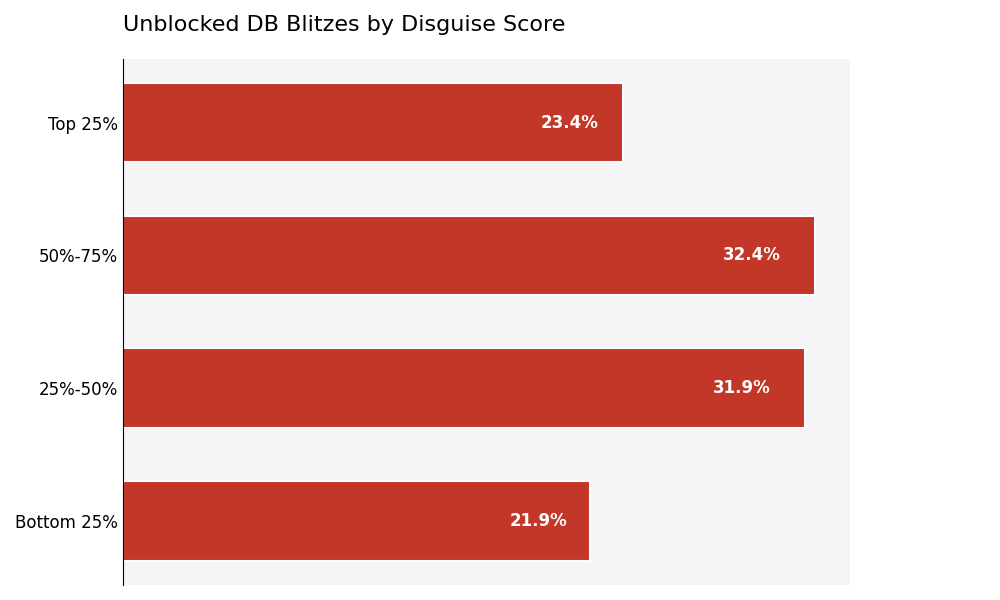

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Unblocked Pressure']
quarters = list(percentages.keys())[::-1]
values = np.array([[percentages[quarter][cat] for cat in categories] for quarter in quarters])

colors = ['#1984c5', '#c23728']
ax.set_facecolor('#F5F5F5')

bars = ax.barh(quarters, values[:, 0], label='Unblocked Pressure', color=colors[1], height=0.6, align='center', edgecolor='white', linewidth=1.5)

for bar in bars:
    width = bar.get_width()
    ax.text(width*0.95, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center', ha='right', color='white', fontsize=12, fontweight='bold')

for i, bar in enumerate(ax.patches[len(bars):]):
    width = bar.get_width()
    ax.text(width*0.95, bar.get_y() + bar.get_height()/2, f'{values[i, 1]:.1f}%', va='center', ha='right', color='white', fontsize=12, fontweight='bold')

ax.set_yticks(np.arange(len(quarters)))  # Position of y-ticks
ax.set_yticklabels(['Bottom 25%', '25%-50%', '50%-75%', 'Top 25%'], fontsize=12, rotation=0)

ax.set_xticks([])
ax.tick_params(axis='y', which='major', length=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title('Unblocked DB Blitzes by Disguise Score', fontsize=16, pad=20, loc="left")

plt.tight_layout()
fig.subplots_adjust(right=0.85)
plt.show()
plt.savefig('../reports/figures/figure_4.png', format='png', dpi=300, bbox_inches='tight')